# Tutorial: Threshold public goods game

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

In [2]:
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.figsize'] = [7, 5]
from IPython.core.display import HTML
HTML("""
    <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle;
        }
    </style>
""")

## 1. Example threshold game

Normalise the game by setting maximum benefit $b = 1$

In [3]:
b = 1

Write the cooperator and defector payoffs in terms of $k$, the number of cooperators among the $n-1$ other members of the group

In [4]:
# cooperator payoff pi_C(k)
ak = lambda k, tau, c: b-c if k >= tau-1 else -c

# defector payoff pi_D(k)
bk = lambda k, tau: b if k >= tau else 0

The fitness effects:

In [5]:
# fitness effect of playing cooperate (p is the proportion of cooperators)
fC = lambda p, n, tau, c: sum(binom(n-1, k) * p**k * (1-p)**(n-1-k) * ak(k, tau, c) for k in range(n))

# fitness effect of playing defect
fD = lambda p, n, tau: sum(binom(n-1, k) * p**k * (1-p)**(n-1-k) * bk(k, tau) for k in range(n))

The replicator dynamics equation $\dot{p}_C$

In [6]:
# the function defining dp/dt
dot_pC = lambda pC, n, tau, c: pC*(1-pC)*(fC(pC, n, tau, c) - fD(pC, n, tau))

My choice of paramater values for this example

In [7]:
# choose parameter values
n = 8
tau = 5
c = 0.2

Write the $\dot{p}$ function and evaluate it for a bunch of points between $p_C = 0$ and $p_C = 1$.

In [8]:
# evaluate dp/dt for values of p between 0 and 1
pV = np.linspace(0, 1, 100)
dot_pC_res = [dot_pC(pC, n, tau, c) for pC in pV]

Plot $\dot{p}_C$ versus $p_C$

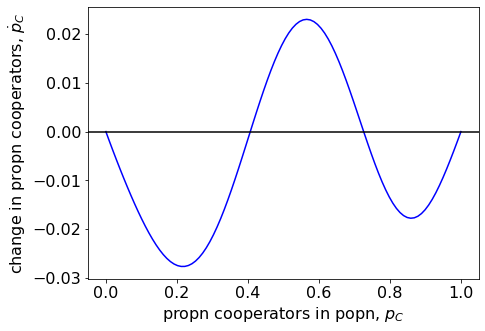

In [9]:
plt.plot(pV, dot_pC_res, color='blue', label='$\dot{p}_C$')
plt.axhline(0, color='black') # a vertical line to show where the x-axis
plt.xlabel('propn cooperators in popn, $p_C$')
plt.ylabel('change in propn cooperators, $\dot{p}_C$')
plt.show()

*Discuss steady states*

## 2. Bonus: finding the steady states numerically

You can't find the interior roots of this function analytically, so we use a numerical method.

To find the interior steady states, we only need to look at the $f_C - f_D$ term, which is also called the "gain function". I plot it below.

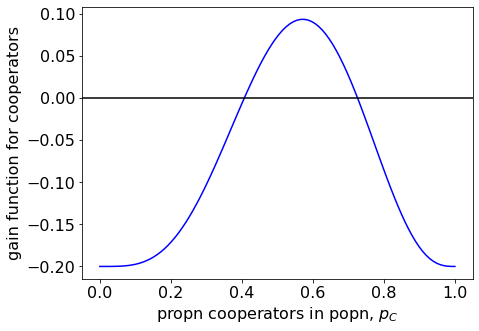

In [10]:
gainC = lambda pC: fC(pC, n, tau, c) - fD(pC, n, tau)

gainC_res = [gainC(pC) for pC in pV]

plt.plot(pV, gainC_res, color='blue', label='$\dot{p}_C$')
plt.axhline(0, color='black') # a vertical line to show where the x-axis is
plt.xlabel('propn cooperators in popn, $p_C$')
plt.ylabel('gain function for cooperators')
plt.show()

There are many root finding methods; I'll choose...

In [11]:
from scipy.optimize import brentq

Looking at the graph, I know one steady state is somewhere between $p_C = 0.3$ and 0.5, and another between 0.5 and 0.8. So I'll make those my search bounds.

In [12]:
p_lo = brentq(gainC, 0.3, 0.5)
p_hi= brentq(gainC, 0.5, 0.8)

Replot with black dots where the steady states I found are.

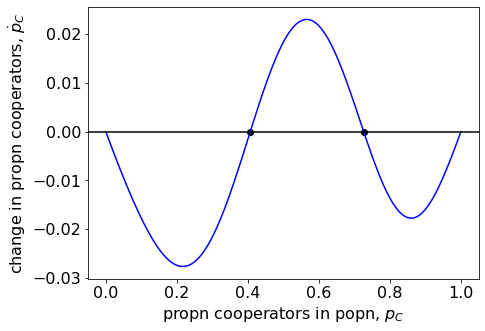

In [13]:
plt.scatter([p_lo, p_hi], [0, 0], color='black')

plt.plot(pV, dot_pC_res, color='blue', label='$\dot{p}_C$')
plt.axhline(0, color='black') # a vertical line to show where the x-axis
plt.xlabel('propn cooperators in popn, $p_C$')
plt.ylabel('change in propn cooperators, $\dot{p}_C$')
plt.show()

## 3. Your turn - plot $\dot{p}$ for the scenario you were designated to

### 3.1 Group 1: What happens if we increase cost of contributing $c$?

In [14]:
# choose parameter values
n = 8
tau = 5
c = 0.3 # <-- increased cost

### 3.2 Group 2: What happens if we make $\tau = 1$ (even if we make costs really high)?

In [15]:
# choose parameter values
n = 8
tau = 1 # <-- tau reduced to 1
c = 0.5 # <-- cost increased

### 3.3 Group 3: What happens if we make $\tau = n$ (even if we make costs high)?

In [16]:
# choose parameter values
n = 8
tau = n # <-- tau increased to n
c = 0.5 # <-- cost increased